In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

In [7]:
df = pd.read_csv('../data/merged_APPA_data.csv', encoding='windows-1252')

    Year  Month     Valore
0   2018      1  21.571242
1   2018      2  20.782090
2   2018      3  21.225722
3   2018      4  12.545969
4   2018      5  10.560052
5   2018      6  11.418056
6   2018      7  13.151678
7   2018      8  11.181690
8   2018      9  11.224462
9   2018     10  13.684211
10  2018     11  13.064516
11  2018     12  19.993280


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

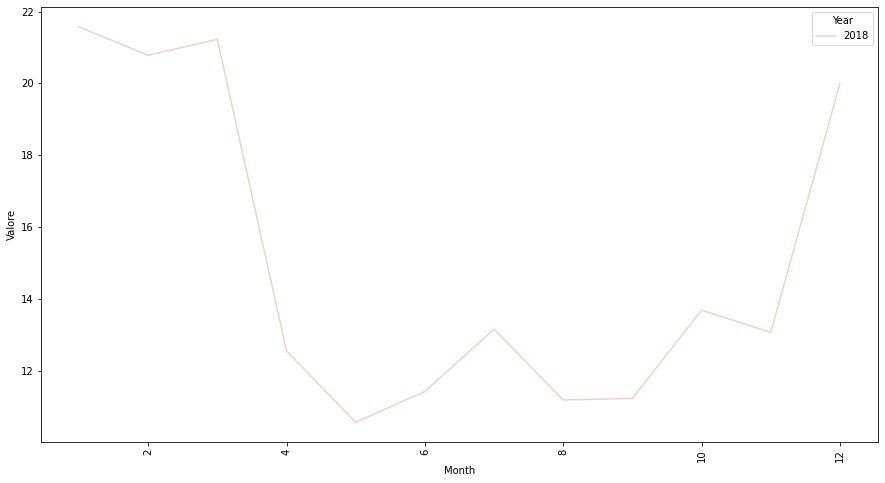

In [9]:
df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
#example for the input value below: 
df_year_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "PM2.5") & (df.Data.dt.year == 2018)]
df_year_avg = df_year_avg.groupby(pd.PeriodIndex(df_year_avg['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.year, df_year_avg.Data.dt.month]).mean()
df_year_avg.index.names = ["Year", "Month"]
df_year_avg = df_year_avg.reset_index()
print(df_year_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year",data=df_year_avg)
xticks(rotation = 90)


     Year  Month     Valore
0    2012      1  31.359650
1    2012      2  35.384362
2    2012      3  32.708612
3    2012      4  25.925557
4    2012      5  28.295275
..    ...    ...        ...
122  2022      3  35.355791
123  2022      4  27.224740
124  2022      5  27.324037
125  2022      6  30.083651
126  2022      7  30.989408

[127 rows x 3 columns]


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

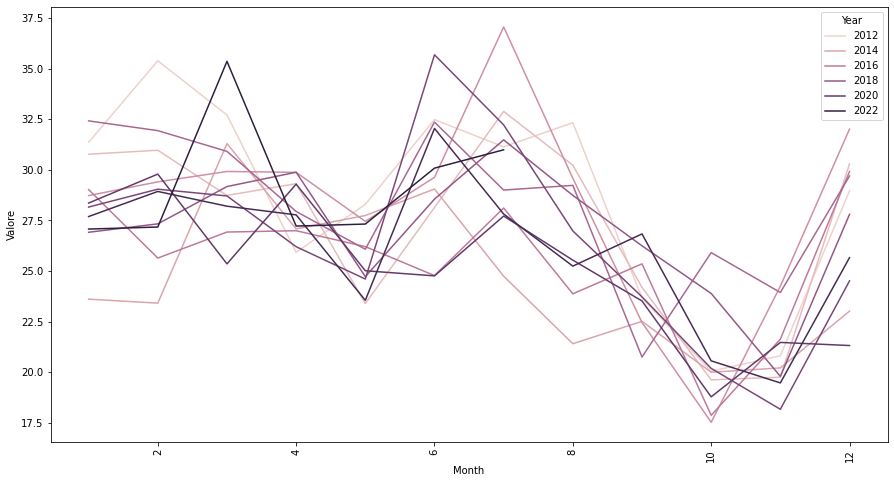

In [9]:
df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_year_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.year, df_year_avg.Data.dt.month]).mean()
df_year_avg.index.names = ["Year", "Month"]
df_year_avg = df_year_avg.reset_index()
print(df_year_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year",data=df_year_avg)
xticks(rotation = 90)
